## Business Problem Understanding

**Context** 

Kita merupakan Data Scientist yang baru direkrut oleh perusahaan Hotel bintang 5. Tanggung jawab kita adalah untuk memprediksi kecenderungan pelanggan yang akan membatalkan pemesanan mereka di hotel kita atau tidak melalui fitur-fitur tertentu. Sebelum menunjuk kita sebagai Data Science, Hotel sering mengalami kerugian pendapatan karena pelanggan tiba-tiba membatalkan pemesanan kamar mereka sehingga kamar menjadi kosong dan tidak dapat ditempati oleh pelanggan lain.




**Problem Statement :**

Pembatalan dapat berdampak buruk pada hotel. Hilangnya pendapatan terjadi sebagai akibat dari kamar yang tidak terjual. No-show adalah pembatalan tanpa pemberitahuan. 

Ketika sebuah hotel dihadapkan dengan pembatalan menit terakhir dan kemudian check-in menit terakhir, hotel tidak bisa berbuat banyak selain menjual kamar dengan harga yang jauh lebih rendah, jadi peluang untuk mendapatkan revenue yang maksimal sangat minim.

Dan kemudian, ada juga biaya penggunaan layanan Online Travel Agent (OTA) untuk check-in menit terakhir. Hotel harus membayar biaya tertentu kepada OTA karena OTA bertindak sebagai perantara mereka, sehingga menurunkan keuntungan.

Tetapi jika hotel tidak bergantung pada OTA atau tidak memiliki unduhan otomatis pemesanan dan pembatalan, maka waktu pemesanan dan pembatalan tinggi, dan lebih banyak waktu berarti biaya lebih tinggi.

**Goals :**

Bagaimana kita dapat memprediksi dan meminimalkan pembatalan pemesanan kamar oleh pelanggan sehingga hotel bisa mendapatkan keuntungan yang maksimal dan pendapatan tambahan dari Makanan dan Minuman dari pelanggan yang menginap di hotel, serta meningkatkan demand agar kamar hotel dapat terisi semua.

**Analytic Approach :**

Kita akan menganalisis faktor apa saja yang mempengaruhi pembatalan pemesanan kamar hotel dan menentukan pola pelanggan yang akan membatalkan pemesanan atau tidak. 

Lalu kita akan coba untuk membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas pelanggan yang akan membatalkan pesanannya atau tidak


**Metric Evaluation**

1. True-Positive : Kita memperkirakan bahwa pelanggan akan membatalkan pemesanan mereka dan ternyata benar mereka membatalkan pemesanannya
Konsekuensi: Kita dapat memaksimalkan keuntungan kita dengan mengisi kamar kita sepenuhnya, serta mendapatkan keuntungan tambahan dari layanan F&B.

2. False-Negative : Kita memperkirakan bahwa pelanggan tidak akan membatalkan pemesanan mereka dan ternyata mereka membatalkan pemesanan mereka
Konsekuensi: Kamar yang dibatalkan pelanggan akan tetap kosong dan hotel akan kehilangan keuntungan di kamar ini, sementara sebenarnya kita dapat mengisinya dengan pelanggan lain.

3. False Positive : Kita memperkirakan bahwa pelanggan akan membatalkan pemesanan mereka dan sebenarnya mereka tidak membatalkan pemesanan mereka
Konsekuensi: Kita akan kehilangan pelanggan,dan revenue yang di peroleh perusahaan akan berkurang karena kita salah memprediksi pelanggan yang berpotensial untuk menginap.

4. True-Negative : Kita memperkirakan bahwa pelanggan tidak akan membatalkan pemesanan mereka dan sebenarnya mereka tidak membatalkan pemesanan mereka
Konsekuensi: Mayoritas karakteristik pelanggan yang memesan kamar hotel.

### Attribute Information

| Attribute | Data Type | Description |
| --- | --- | --- |
| country | Text | Country of origin |
| market_segment | Text | Market segment designation, typically influences the price sensitivity |
| previous_cancellations  | Integer | Number of previous cancellations prior to current booking |
| booking_changes | Integer | Number of changes made to the booking since entering the hotel management system |
| deposit_type | Text | Type of deposit made for the reservation |
| days_in_waiting_list | Integer | Number of days booking was in the waiting list until it was confirmed |
| customer_type | Text | Type of booking |
| reserved_room_type  | Integer | Code of room type reserved |
| required_car_parking_spaces | Integer | Number of car parking spaces requested |
| total_of_special_requests | Integer | Number of special requests made by the customer |
| is_canceled | Integer | Value indicating if the booking was canceled (1) or not (0) |


# 1.Data Understanding

In [208]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [209]:
#Load Dataset
df = pd.read_csv("data_hotel_booking_demand.csv")
df.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


In [210]:
# Count and Datatype for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


In [211]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,country,object,351,0.42,162,"[JAM, PRI]"
1,market_segment,object,0,0.00,8,"[Groups, Complementary]"
2,previous_cancellations,int64,0,0.00,15,"[24, 3]"
3,booking_changes,int64,0,0.00,19,"[12, 13]"
4,deposit_type,object,0,0.00,3,"[No Deposit, Refundable]"
5,days_in_waiting_list,int64,0,0.00,115,"[46, 165]"
6,customer_type,object,0,0.00,4,"[Group, Contract]"
7,reserved_room_type,object,0,0.00,10,"[P, G]"
8,required_car_parking_spaces,int64,0,0.00,5,"[8, 3]"
9,total_of_special_requests,int64,0,0.00,6,"[0, 3]"


# 2. Data Cleaning

### 2.1 Handle Missing Value

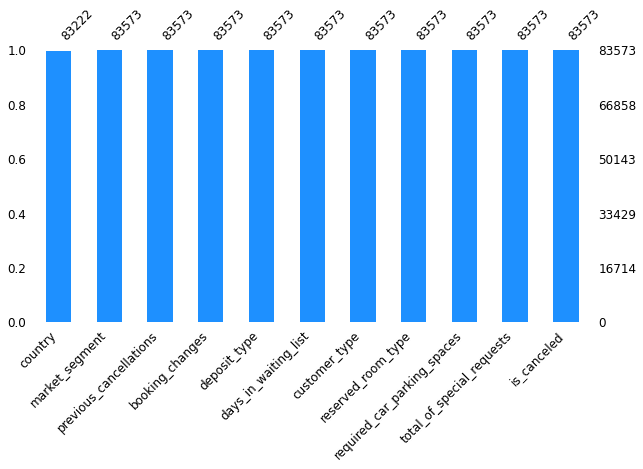

In [212]:
msno.bar(df,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

Terdapat missing value sebanyak 351 di kolom Country , dimana banyak datanya sebesar 83.222 sedangkan kolom lain sebesar 83.573

<AxesSubplot:>

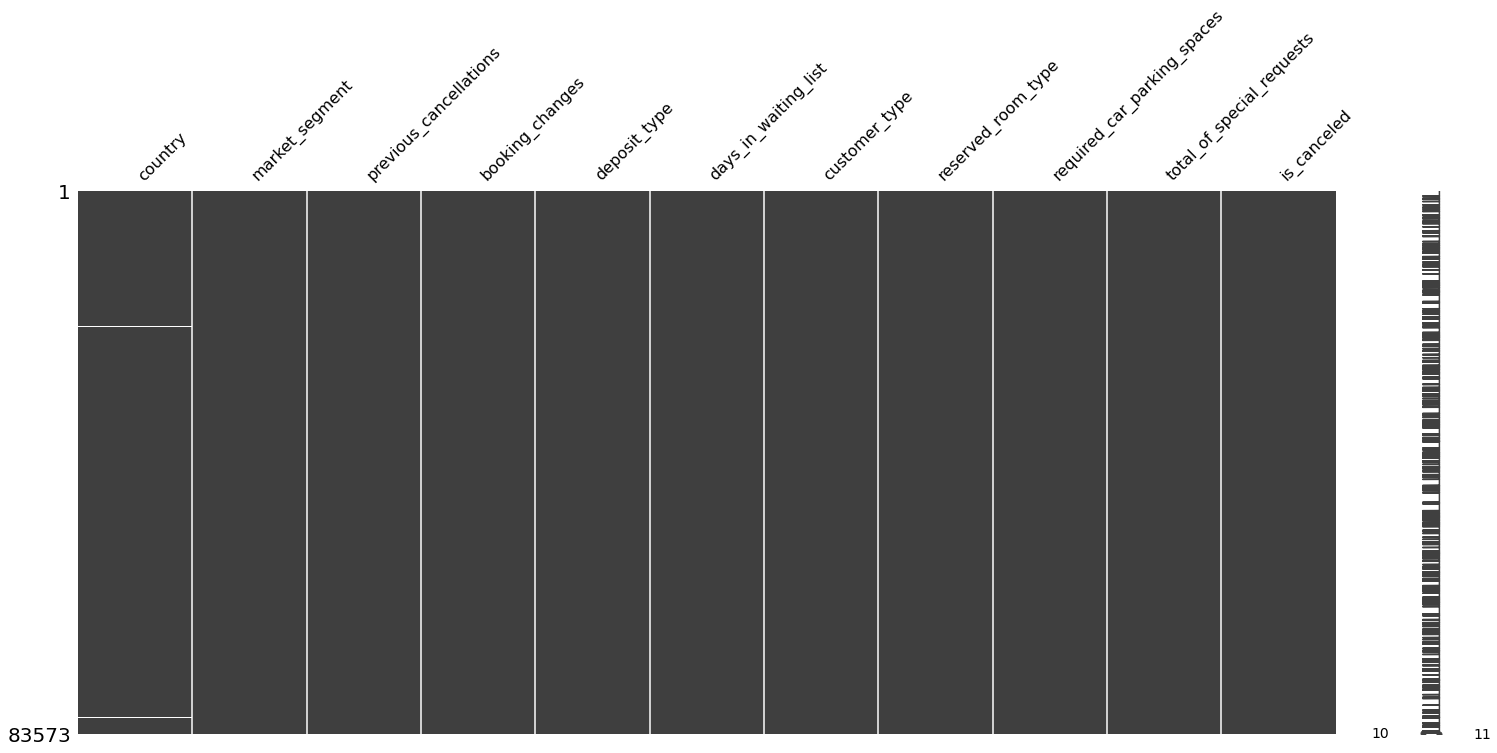

In [213]:
msno.matrix(df)

In [214]:
df.drop(['country'],axis=1, inplace=True)

In [215]:
df.isna().sum()

market_segment                 0
previous_cancellations         0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
reserved_room_type             0
required_car_parking_spaces    0
total_of_special_requests      0
is_canceled                    0
dtype: int64

Data sudah tidak terdapat missing value lagi

### 2.2 Duplicate Data

In [216]:
# Check Duplicate Data
df.duplicated().any()

True

In [217]:
# Show duplicate data
duplicate = df[df.duplicated() == True]
duplicate

,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
7,Groups,0,0,Non Refund,0,Transient,A,0,0,1
18,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
21,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
22,Groups,0,0,Non Refund,0,Transient,A,0,0,1
26,Offline TA/TO,0,0,No Deposit,0,Transient,D,0,0,0
...,...,...,...,...,...,...,...,...,...,...
83568,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


Terdapat 73.371 data duplikat dalam data, namun duplikat data ini tidak memiliki informasi unik(nama/nomor pelanggan atau tanggal) yang dapat membedakan satu data dengan data lainnya sehingga kita tidak memberikan perlakuan khusus untuk data duplikat ini

In [218]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,market_segment,object,0,0.0,8,"[Undefined, Online TA]"
1,previous_cancellations,int64,0,0.0,15,"[11, 21]"
2,booking_changes,int64,0,0.0,19,"[12, 16]"
3,deposit_type,object,0,0.0,3,"[No Deposit, Refundable]"
4,days_in_waiting_list,int64,0,0.0,115,"[9, 84]"
5,customer_type,object,0,0.0,4,"[Transient-Party, Transient]"
6,reserved_room_type,object,0,0.0,10,"[E, B]"
7,required_car_parking_spaces,int64,0,0.0,5,"[2, 1]"
8,total_of_special_requests,int64,0,0.0,6,"[3, 0]"
9,is_canceled,int64,0,0.0,2,"[1, 0]"


# 3.Data Analysis

Data kita sudah bersih dimana tidak ada missing value lagi. Sekarang kita bisa pakai data ini untuk keperluan pembuatan model machine learning

### 3.1 Check Imbalance Data

Kita akan melihat nilai dari kolom yang sudah kita targetkan (is_canceled) apakah terdapat perbedaan proporsi yang signifikan antar valuenya. Karena jika salah satu nilai di dalam kolom perbedaannya signifikan, akan dikategorikan sebagai imbalance data yang dimana akan berpengaruh terhadap Model kita nantinya

In [219]:
df['is_canceled'].value_counts()

0    52795
1    30778
Name: is_canceled, dtype: int64

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

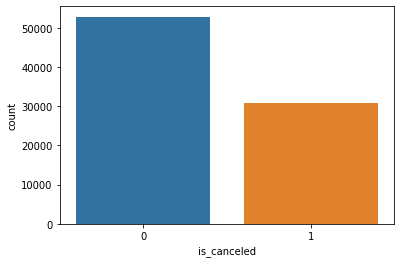

In [220]:
sns.countplot(df['is_canceled'])

In [221]:
(pd.crosstab(index=df['is_canceled'],columns='Proportion (%)',normalize=True)*100).round(2)

col_0,Proportion (%)
is_canceled,
0,63.17
1,36.83


Dari presentase di atas kita bisa memastikan bahwa data kita tidak Imbalance karena mayoritas data tidak diatas 70% 

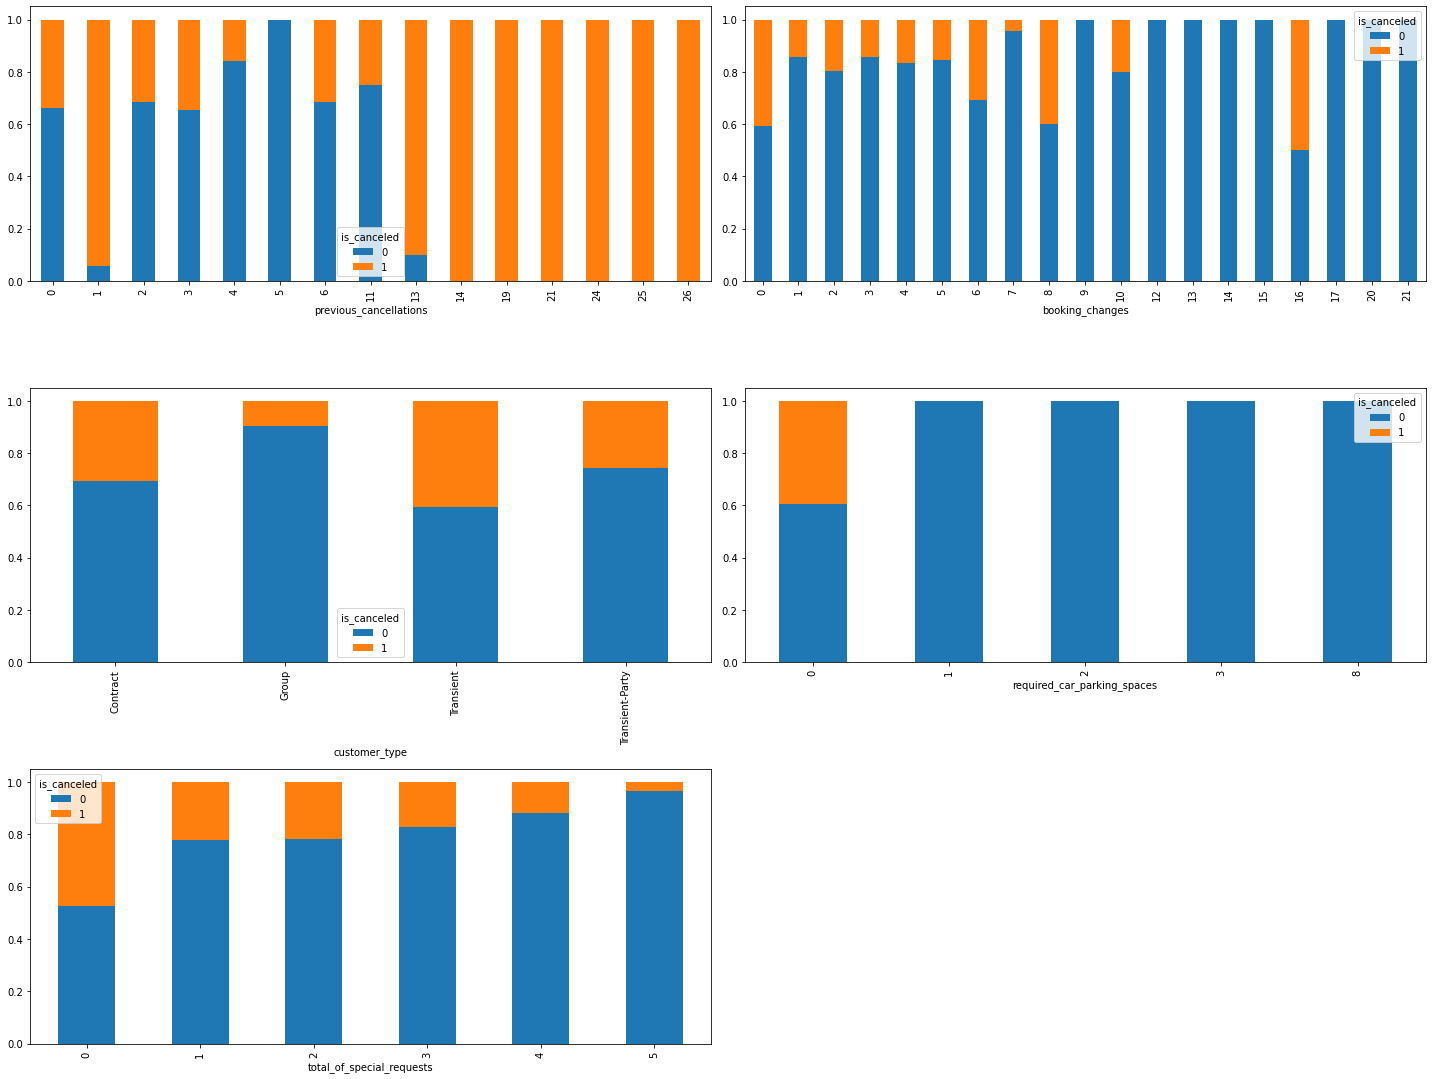

In [222]:
count = 0
fig = plt.figure(figsize=(20,20))

for i in df.drop(columns=['is_canceled','market_segment','deposit_type','reserved_room_type','days_in_waiting_list']).columns:
    count +=1
    ax= plt.subplot(4,2,count)
    pd.crosstab(df[i],df['is_canceled'],normalize=0).plot(kind='bar',stacked=True,ax=ax)
    fig.tight_layout()

plt.show()

In [223]:
for i in df.drop(columns=['is_canceled','market_segment','deposit_type','reserved_room_type','customer_type']).columns:
    impact_category = df.groupby(i)['is_canceled'].value_counts(normalize=True).unstack()
    display(impact_category.sort_values(by=[1.0], ascending=False))

is_canceled,0,1
previous_cancellations,,
14,NaN,1.000000
19,NaN,1.000000
21,NaN,1.000000
24,NaN,1.000000
25,NaN,1.000000
26,NaN,1.000000
1,0.056572,0.943428
13,0.100000,0.900000
3,0.652174,0.347826


is_canceled,0,1
booking_changes,,
16,0.500000,0.500000
0,0.593639,0.406361
8,0.600000,0.400000
6,0.692308,0.307692
10,0.800000,0.200000
2,0.802790,0.197210
4,0.834615,0.165385
5,0.844444,0.155556
3,0.856025,0.143975


is_canceled,0,1
days_in_waiting_list,,
391,NaN,1.0
71,NaN,1.0
79,NaN,1.0
26,NaN,1.0
76,NaN,1.0
...,...,...
121,1.0,NaN
150,1.0,NaN
185,1.0,NaN


is_canceled,0,1
required_car_parking_spaces,,
0,0.607153,0.392847
1,1.000000,NaN
2,1.000000,NaN
3,1.000000,NaN
8,1.000000,NaN


is_canceled,0,1
total_of_special_requests,,
0,0.524904,0.475096
1,0.780047,0.219953
2,0.784320,0.215680
3,0.827915,0.172085
4,0.881356,0.118644
5,0.967742,0.032258


Berdasarkan barplot dan table diatas kita dapat menyimpulkan beberapa hal :
1. Customers yang sering melakukan cancellation booking sebelumnya (`previous_cancellation`) cenderung akan melakukan booking cancellation lagi kedepannya
2. Customers yang tidak melakukan cancellation booking ternyata mayoritas melakukan `booking_changes` sebelumnya. Semantara itu customer yang melakukan cancellation mayoritas yang jarang melakukan `booking_changes`
3. Untuk table `days_in_waiting_list`, kita tidak bisa menebak customer yang sudah menunggu dalam periode waktu yang singkat atau yang bahkan setahun lebih akan membatalkan pemesanan atau tidak. Namun kita bisa berasumsi bahwa cutsomer yang sudah menunggu lama tidak akan membatalkan pemesanan kamar karena mereka akan merasa waktunya terbuang sia-sia hanya untuk menunggu dan mereka bisa melewatkan kesempatan-kesempatan untuk memesan kamar yang lain sehingga customers akan rela menunggu dalam waktu yang lama sampai kamar yang mereka pesan bisa di tempati.
4. Pada table `required_car_parking_spaces`, customer yang request tempat parkir dalam pemesanan kamarnya tidak membatalkan transaksi pemesanan kamar mereka dan tidak ada pelanggan yang membatalkan pemesanan mereka meminta tempat parkir terhadap hotel tersebut.
5. Customer yang memiliki special request (`total_of_special_request`) lebih memilih untuk tidak membatalkan pemesanan kamar dibandingkan yang tidak memiliki special request

# 4.Data Preparation

In [224]:
df.head()

,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


### 4.1 Feature Column

#### 4.1.2 Market Segment

In [225]:
df['market_segment'].unique()

array(['Offline TA/TO', 'Online TA', 'Direct', 'Groups', 'Corporate',
       'Complementary', 'Aviation', 'Undefined'], dtype=object)

In [226]:
(pd.crosstab(index=df['market_segment'], columns='Number of Bookings(%)', normalize=True)*100).round(2).sort_values('Number of Bookings(%)', ascending=False).head(10)

col_0,Number of Bookings(%)
market_segment,
Online TA,47.22
Offline TA/TO,20.37
Groups,16.42
Direct,10.65
Corporate,4.54
Complementary,0.61
Aviation,0.20
Undefined,0.00


Dari table di atas mayoritas pemesanan kamar hotel di pesan oleh customer melalui Online Travel Agent. Dikarenakan segment lain memiliki presentase yang kecil maka kita akan mengelompokan segment-segment tersebut ke dalam kategori 'Others'

In [227]:
def segment(x):
    if x == 'Online TA':
        return x
    else:
        return 'Others'

In [228]:
# Encoding Market_Segment Category using One Hot Encoding
df['market_segment'] = df['market_segment'].apply(segment)
df2 = pd.get_dummies(df, columns=['market_segment'])
df2.head()

,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled,market_segment_Online TA,market_segment_Others
0,0,0,No Deposit,0,Transient-Party,A,0,0,0,0,1
1,0,0,No Deposit,0,Transient,A,0,2,0,1,0
2,0,1,No Deposit,0,Transient,A,0,2,0,1,0
3,0,0,No Deposit,0,Transient,A,0,1,1,1,0
4,0,2,No Deposit,0,Transient,A,0,2,0,1,0


#### 4.1.3 Deposit Type

In [229]:
df['deposit_type'].unique()

array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object)

Karena kolom deposit type memiliki jumlah data unique yang sedikit kita akan langsung encoding kolom deposit type tanpa harus di kategorikan dahulu seperti kolom yang lain. 

In [230]:
df2 = pd.get_dummies(df, columns=['market_segment','deposit_type'])
df2.head()

,previous_cancellations,booking_changes,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled,market_segment_Online TA,market_segment_Others,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable
0,0,0,0,Transient-Party,A,0,0,0,0,1,1,0,0
1,0,0,0,Transient,A,0,2,0,1,0,1,0,0
2,0,1,0,Transient,A,0,2,0,1,0,1,0,0
3,0,0,0,Transient,A,0,1,1,1,0,1,0,0
4,0,2,0,Transient,A,0,2,0,1,0,1,0,0


#### 4.1.4 Customer Type

In [231]:
df['customer_type'].unique()

array(['Transient-Party', 'Transient', 'Contract', 'Group'], dtype=object)

Karena kolom customer type memiliki jumlah data unique yang sedikit kita akan langsung encoding kolom customer type tanpa harus di kategorikan dahulu seperti kolom yang lain. 

In [232]:
df2 = pd.get_dummies(df, columns=['market_segment','deposit_type','customer_type'])
df2.head()

,previous_cancellations,booking_changes,days_in_waiting_list,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled,market_segment_Online TA,market_segment_Others,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,0,0,A,0,0,0,0,1,1,0,0,0,0,0,1
1,0,0,0,A,0,2,0,1,0,1,0,0,0,0,1,0
2,0,1,0,A,0,2,0,1,0,1,0,0,0,0,1,0
3,0,0,0,A,0,1,1,1,0,1,0,0,0,0,1,0
4,0,2,0,A,0,2,0,1,0,1,0,0,0,0,1,0


#### 4.1.5 Reserved Room Type

In [233]:
df['reserved_room_type'].unique()

array(['A', 'E', 'D', 'F', 'B', 'G', 'C', 'H', 'L', 'P'], dtype=object)

Pada dasarnya untuk setiap room di bagi menjadi beberapa kelas, mulai dari yang paling lengkap fasilitasnya sampai yang tidak lengkap. Namun pada kolom `reserved_room_type` setiap kelasnya tidak diberikan informasi apapun tentang fasilitas yang di dapat. Maka dari itu kita akan membagi menjadi dua kelas seperti pd kolom-kolom sebelumnya

In [234]:
(pd.crosstab(index=df['reserved_room_type'], columns='Number of Bookings(%)', normalize=True)*100).round(2).sort_values('Number of Bookings(%)', ascending=False).head(10)

col_0,Number of Bookings(%)
reserved_room_type,
A,71.84
D,16.18
E,5.56
F,2.44
G,1.73
B,0.94
C,0.81
H,0.48
P,0.01


Untuk kamar tipe A memiliki presentase yang paling besar di antara kamar tipe lain. Kita akan membagi menjadi dua kategori yaitu `reserved_room_type_A` dan `reserved_room_type_Others`

In [235]:
def room_type(x):
    if x == 'A':
        return x
    else:
        return 'Others'

In [236]:
df['reserved_room_type'] = df['reserved_room_type'].apply(room_type)
df2 = pd.get_dummies(df, columns=['market_segment','deposit_type','customer_type','reserved_room_type'])
df2.head()

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled,market_segment_Online TA,market_segment_Others,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reserved_room_type_A,reserved_room_type_Others
0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0
1,0,0,0,0,2,0,1,0,1,0,0,0,0,1,0,1,0
2,0,1,0,0,2,0,1,0,1,0,0,0,0,1,0,1,0
3,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,1,0
4,0,2,0,0,2,0,1,0,1,0,0,0,0,1,0,1,0


#### 4.2 Domain Knowledge

2. Market Segment : Secara garis besar pelanggan yang memesan secara online lebih nyaman untuk membatalkan dan memesan ulang daripada pelanggan yang langsung datang ke hotel atau melalui kantor travel agent.
3. Deposit Type : pemesanan yang dilakukan dimana deposit dapat dikembalikan jika pemesanan dibatalkan, biasanya memiliki kecenderungan yang lebih tinggi untuk membatalkan pemesanan daripada pemesanan yang dilakukan dengan persyaratan deposit tidak dikembalikan.
4. Customer Type : pelanggan yang melakukan pemesanan untuk grup akan memiliki kecenderungan yang jauh lebih rendah untuk membatalkan pemesanan mereka karena perencanaan perjalanan untuk pelanggan yang bepergian dalam grup harus lebih pasti daripada tur individu.
5. Room Type : pelanggan yang memesan kamar lebih murah seharusnya memiliki kecenderungan yang lebih tinggi untuk membatalkan karena pelanggan di level ini akan mencari harga serendah mungkin, jadi jika ada potongan harga untuk kamar lain, mereka akan membatalkan pemesanan sebelumnya dan akan memesan kamar dengan harga yang sudah di diskon oleh pihak hotel.

In [237]:
df2.dtypes

previous_cancellations           int64
booking_changes                  int64
days_in_waiting_list             int64
required_car_parking_spaces      int64
total_of_special_requests        int64
is_canceled                      int64
market_segment_Online TA         uint8
market_segment_Others            uint8
deposit_type_No Deposit          uint8
deposit_type_Non Refund          uint8
deposit_type_Refundable          uint8
customer_type_Contract           uint8
customer_type_Group              uint8
customer_type_Transient          uint8
customer_type_Transient-Party    uint8
reserved_room_type_A             uint8
reserved_room_type_Others        uint8
dtype: object

#### 4.3 Multicollinearity

Kita menggunakan Association sebagai metrik untuk menentukan tingkat korelasi antara fitur dan target karena Rasio Korelasi hanya cocok untuk kolom Kategori ke Numerik (semua kolom fitur kita adalah numerik, semua fitur kategori telah diencoding sebelumnya). Untuk Association, kita menggunakan Theil's U daripada Cramer's V karena Cramer's V memiliki kemungkinan untuk menghasilkan bias.

reference : https://medium.com/the-researchers-guide/generate-numerical-correlation-and-nominal-association-plots-using-python-c8548aa4a663



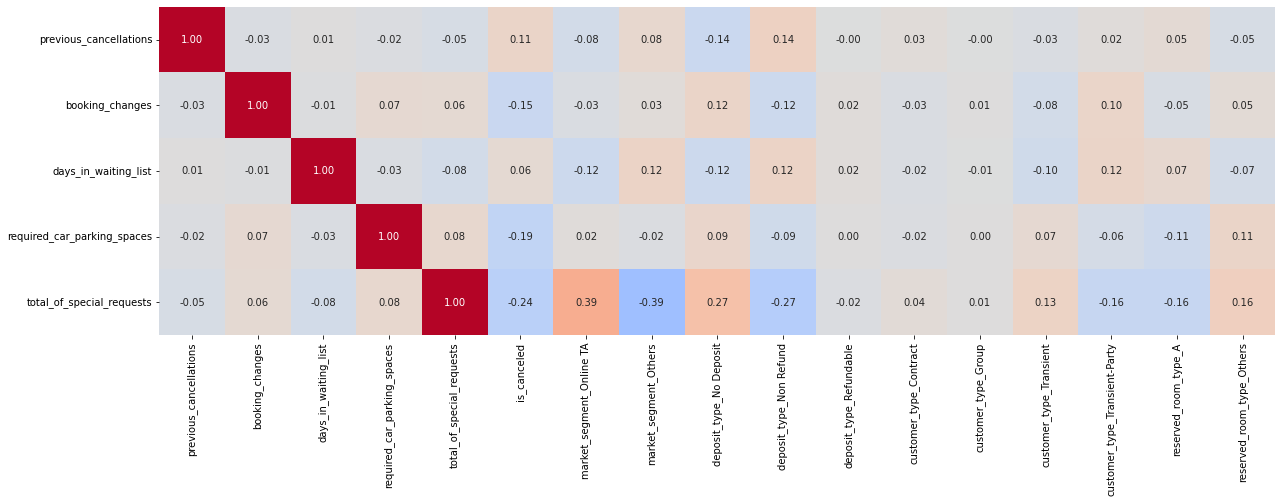

{'corr':                              previous_cancellations  booking_changes  \
 previous_cancellations                     1.000000        -0.027361   
 booking_changes                           -0.027361         1.000000   
 days_in_waiting_list                       0.006895        -0.010687   
 required_car_parking_spaces               -0.018208         0.068508   
 total_of_special_requests                 -0.048026         0.055748   
 
                              days_in_waiting_list  \
 previous_cancellations                   0.006895   
 booking_changes                         -0.010687   
 days_in_waiting_list                     1.000000   
 required_car_parking_spaces             -0.030333   
 total_of_special_requests               -0.083275   
 
                              required_car_parking_spaces  \
 previous_cancellations                         -0.018208   
 booking_changes                                 0.068508   
 days_in_waiting_list                      

In [238]:
import dython as dy
from dython.nominal import associations
associations(df2, figsize=(20,10), cbar=False,cmap='coolwarm', nom_nom_assoc='theil', display_rows=['previous_cancellations',
                                                                                    'booking_changes',
                                                                                    'days_in_waiting_list',
                                                                                    'required_car_parking_spaces',
                                                                                    'total_of_special_requests'])

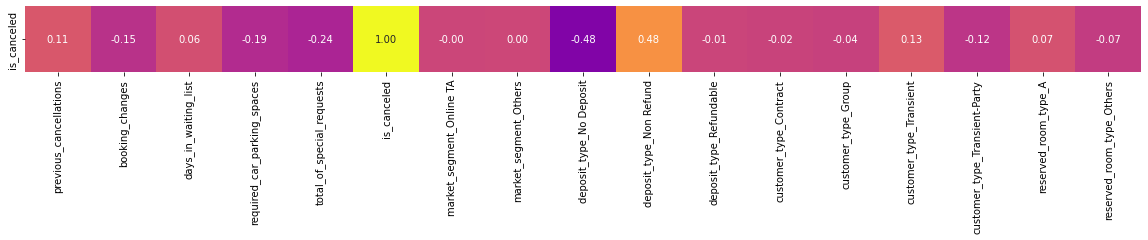

{'corr':              previous_cancellations  booking_changes  days_in_waiting_list  \
 is_canceled                0.109598        -0.145746              0.056203   
 
              required_car_parking_spaces  total_of_special_requests  \
 is_canceled                    -0.194807                  -0.235993   
 
              is_canceled  market_segment_Online TA  market_segment_Others  \
 is_canceled          1.0                  -0.00493                0.00493   
 
              deposit_type_No Deposit  deposit_type_Non Refund  \
 is_canceled                -0.477539                 0.481102   
 
              deposit_type_Refundable  customer_type_Contract  \
 is_canceled                -0.011981               -0.023979   
 
              customer_type_Group  customer_type_Transient  \
 is_canceled            -0.040125                 0.129772   
 
              customer_type_Transient-Party  reserved_room_type_A  \
 is_canceled                      -0.120149              0.070616  

In [239]:
associations(df2, figsize=(20,10),cmap='plasma', cbar=False, nom_nom_assoc='theil', display_rows=['is_canceled'])

Heatmap di atas menunjukkan bahwa tidak terdapat multicollinearity karena setiap fitur memiliki nilai yang berbeda

# 5. Modelling & Evaluation

#### 5.1 Splitting Data

In [240]:
x=df2.drop(columns='is_canceled') 
y=df2['is_canceled'] 

In [241]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.80, random_state=42, stratify=y)


In [242]:
print(x_train.shape, x_test.shape)

(66858, 16) (16715, 16)


#### 5.2 Base Model Logistic Regression


Model - Cancellation Detection

    Class 0 - Tidak Cancel -> Negative
    Class 1 - Cancel -> Positive
    GOALS : Meminimalkan False-Ngeative (mendeteksi tidak adanya pembatalan namun kenyataannya ada pembatalan)
            Karena tujuan kita untuk mengurangi False Negative maka kita akan mencari model dengan score Recall paling tinggi


Dalam kasus klasifikasi berikut ini kita akan menggunakan Logistic Regression untuk base modelnya

In [243]:
logreg = LogisticRegression()


In [244]:
logreg.fit(x_train, y_train)

LogisticRegression()

#### 5.2.1 Evaluation Metric LogisticRegression

In [245]:
## Evaluation Metric scoring for Model
def eval_metrics(model,x_train,x_test,y_train,y_test,Nama):
    Model=model.fit(x_train,y_train)
    predictions=Model.predict(x_train)
    accuracy=accuracy_score(y_train,predictions)
    recall=recall_score(y_train,predictions)
    precision=precision_score(y_train,predictions)
    f1=f1_score(y_train,predictions)

    y_pred_test=Model.predict(x_test)
    accuracy_test=accuracy_score(y_test,y_pred_test)
    recall_test=recall_score(y_test,y_pred_test)
    precision_test=precision_score(y_test,y_pred_test)
    f1_test=f1_score(y_test,y_pred_test)
    
    data_logreg={
    Nama + ' Training':[accuracy,recall,precision,f1],
    Nama + ' Testing':[accuracy_test,recall_test,precision_test,f1_test]
}

    df_logreg=(pd.DataFrame(data_logreg,index=['Accuracy','Recall','Precision','F1']).T).round(4)
    report_train=classification_report(y_train,predictions)
    cm_train=confusion_matrix(y_train,predictions,labels=[1,0])
    df_train=pd.DataFrame(data=cm_train,columns=['Pred 1','Pred 0'],index=['Akt 1','Akt 0'])

    report_test=classification_report(y_test,y_pred_test)
    cm_test=confusion_matrix(y_test,y_pred_test,labels=[1,0])
    df_test=pd.DataFrame(data=cm_test,columns=['Pred 1','Pred 0'],index=['Akt 1','Akt 0'])

    return df_logreg,report_train,df_train,report_test,df_test

## Run Function
df_logreg, report_logreg_tr, cm_logreg_tr, report_logreg_ts, cm_logreg_ts = eval_metrics(logreg,x_train,x_test,y_train,y_test,'LogReg Base')

In [246]:
df_logreg

,Accuracy,Recall,Precision,F1
LogReg Base Training,0.7937,0.6089,0.7825,0.6849
LogReg Base Testing,0.7931,0.6014,0.7867,0.6816


In [247]:
print(report_logreg_tr, report_logreg_ts)

              precision    recall  f1-score   support

           0       0.80      0.90      0.85     42236
           1       0.78      0.61      0.68     24622

    accuracy                           0.79     66858
   macro avg       0.79      0.76      0.77     66858
weighted avg       0.79      0.79      0.79     66858
               precision    recall  f1-score   support

           0       0.80      0.90      0.85     10559
           1       0.79      0.60      0.68      6156

    accuracy                           0.79     16715
   macro avg       0.79      0.75      0.76     16715
weighted avg       0.79      0.79      0.79     16715



Pada base model di atas, kita mendapatkan score Recall sebesar 0.6 dimana nilai tersebut blm cukup ideal. Kita akan melakukan tuning terhadapa model ini agar mendapatkan skor yang cukup ideal untuk dijadikan model

In [248]:
# confusion matrix test
cm_logreg_ts

,Pred 1,Pred 0
Akt 1,3702,2454
Akt 0,1004,9555


#### 5.3 Base Model K-Nearest Neighbors (KNN)

Teknik ini memberikan hasil prediksi berdasarkan kelas mayoritas dari beberapa pengamatan serupa atau 'tetangga' terdekat. Meskipun cukup sederhana dan tidak menghasilkan Model, KNN dapat memberikan akurasi yang memadai dibandingkan dengan metode lain, kelemahannya adalah KNN tidak cukup praktis di sebagian besar kasus dan membutuhkan memori yang besar. KNN bersifat non parametrik, artinya tidak menghasilkan persamaan seperti Linear Regression atau Logistic Regression.



In [249]:
KNN = KNeighborsClassifier()

In [250]:
KNN.fit(x_train, y_train)

KNeighborsClassifier()

##### 5.3.1 Evaluation Metric KNN

In [251]:
df_KNN, report_KNN_tr, cm_KNN_tr, report_KNN_ts, cm_KNN_ts = eval_metrics(KNN,x_train,x_test,y_train,y_test,'KNN Base')

In [252]:
df_KNN

,Accuracy,Recall,Precision,F1
KNN Base Training,0.7563,0.7112,0.6560,0.6825
KNN Base Testing,0.7544,0.7024,0.6554,0.6781


In [253]:
print(report_KNN_tr, report_KNN_ts)

              precision    recall  f1-score   support

           0       0.82      0.78      0.80     42236
           1       0.66      0.71      0.68     24622

    accuracy                           0.76     66858
   macro avg       0.74      0.75      0.74     66858
weighted avg       0.76      0.76      0.76     66858
               precision    recall  f1-score   support

           0       0.82      0.78      0.80     10559
           1       0.66      0.70      0.68      6156

    accuracy                           0.75     16715
   macro avg       0.74      0.74      0.74     16715
weighted avg       0.76      0.75      0.76     16715



Pada base model di atas, kita mendapatkan score Recall diatas 0.7.Untuk base model hasil ini sudah cukup ideal, namun kita akan melakukan tuning agar mendaptkan hasil yang lebih baik lagi.

In [254]:
cm_KNN_ts

,Pred 1,Pred 0
Akt 1,4324,1832
Akt 0,2274,8285


#### 5.3 Base Model Support Vector Machine (SVM)

SVM adalah salah satu metode prediksi yang paling kuat. Setelah memberikan set model SVM dari data pelatihan berlabel untuk setiap kategori, mereka dapat mengkategorikan teks baru. Manfaat menggunakan SVM adalah kecepatan yang lebih tinggi dan kinerja yang lebih baik dalam jumlah data yang rendah/terbatas.

Tujuan dari algoritma SVM adalah untuk membuat garis atau batas keputusan terbaik yang dapat memisahkan ruang n-dimensi ke dalam kelas-kelas sehingga kita dapat dengan mudah menempatkan titik data baru dalam kategori yang benar di masa depan. Batas keputusan terbaik ini disebut hyperplane. SVM memilih titik/vektor ekstrim yang membantu dalam menciptakan hyperplane. Kasus ekstrim ini disebut sebagai support vector, dan karenanya algoritma disebut sebagai Support Vector Machine.



In [255]:
from sklearn.svm import SVC

In [256]:
SVM = SVC()

In [257]:
SVM.fit(x_train, y_train)

SVC()

##### 5.3.1 Evaluation Metric SVM

In [258]:
df_SVM, report_SVM_tr, cm_SVM_tr, report_SVM_ts, cm_SVM_ts = eval_metrics(SVM,x_train,x_test,y_train,y_test,'Support Vector Machine Base')

In [259]:
df_SVM

,Accuracy,Recall,Precision,F1
Support Vector Machine Base Training,0.7655,0.3785,0.9613,0.5431
Support Vector Machine Base Testing,0.7656,0.3798,0.9590,0.5441


In [260]:
print(report_SVM_tr, report_SVM_ts)

              precision    recall  f1-score   support

           0       0.73      0.99      0.84     42236
           1       0.96      0.38      0.54     24622

    accuracy                           0.77     66858
   macro avg       0.85      0.68      0.69     66858
weighted avg       0.82      0.77      0.73     66858
               precision    recall  f1-score   support

           0       0.73      0.99      0.84     10559
           1       0.96      0.38      0.54      6156

    accuracy                           0.77     16715
   macro avg       0.85      0.69      0.69     16715
weighted avg       0.82      0.77      0.73     16715



Skor Recall untuk base model ini sangatlah rendah yaitu di bawah 0.4 maka dari itu kita tidak akan menggunakan model ini kedepannya nanti

In [261]:
cm_SVM_ts

,Pred 1,Pred 0
Akt 1,2338,3818
Akt 0,100,10459


#### 5.4 Base Model Decision Tree

Pohon Keputusan merupakan hierarki pertanyaan yang mengarah pada keputusan. Sama halnya dengan KNN, Decision Tree bersifat non-parametrik dan digunakan untuk menjawab permasalahan yang sulit diselesaikan dengan model parametrik. Dengan metode ini, kita tidak perlu membuat asumsi yang kuat tentang bentuk model, dan juga lebih fleksibel untuk menangkap semua jenis hubungan (linear atau non-linear). Decision Tree juga menghasilkan hasil yang lebih cepat dari KNN, fleksibel dan memiliki interpretability yang tinggi.



In [262]:
dt= DecisionTreeClassifier()

In [263]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

##### 5.4.1 Evaluation Metric Decision Tree

In [264]:
df_dt, report_dt_tr, cm_dt_tr, report_dt_ts, cm_dt_ts = eval_metrics(dt,x_train,x_test,y_train,y_test,'Decision Tree Base')

In [265]:
df_dt

,Accuracy,Recall,Precision,F1
Decision Tree Base Training,0.8029,0.6195,0.8001,0.6983
Decision Tree Base Testing,0.8007,0.6093,0.8020,0.6925


In [266]:
print(report_dt_tr, report_dt_ts)

              precision    recall  f1-score   support

           0       0.80      0.91      0.85     42236
           1       0.80      0.62      0.70     24622

    accuracy                           0.80     66858
   macro avg       0.80      0.76      0.78     66858
weighted avg       0.80      0.80      0.80     66858
               precision    recall  f1-score   support

           0       0.80      0.91      0.85     10559
           1       0.80      0.61      0.69      6156

    accuracy                           0.80     16715
   macro avg       0.80      0.76      0.77     16715
weighted avg       0.80      0.80      0.79     16715



Skor Recall  dalam  Base Model adalah sekitar 0,6. Kita akan melakukan tuning terhadap model ini untuk mendapatkan skor recall yang lebih baik lagi

In [267]:
cm_dt_ts

,Pred 1,Pred 0
Akt 1,3751,2405
Akt 0,926,9633


#### 5.5 Base Model Random Forest

Random Forest adalah metode pembelajaran ensemble untuk klasifikasi, regresi dan tugas-tugas lain yang beroperasi dengan membangun banyak pohon keputusan pada waktu pelatihan. Untuk tugas klasifikasi, output dari hutan acak adalah kelas yang dipilih oleh sebagian besar pohon. Random decision Forest cocok untuk training set yang mengalami overfitting. Random Forest umumnya lebih baik dari pohon keputusan, tetapi akurasinya lebih rendah daripada gradient boost trees. Namun, karakteristik data dapat memengaruhi kinerjanya.


In [268]:
rf = RandomForestClassifier()

In [269]:
rf.fit(x_train, y_train)

RandomForestClassifier()

##### 5.5.1 Evaluation Metric Random Forest

In [270]:
df_rf, report_rf_tr, cm_rf_tr, report_rf_ts, cm_rf_ts = eval_metrics(rf,x_train,x_test,y_train,y_test,'Random Forest Base')

In [271]:
df_rf

,Accuracy,Recall,Precision,F1
Random Forest Base Training,0.8029,0.6202,0.7995,0.6985
Random Forest Base Testing,0.8011,0.6106,0.8022,0.6934


In [272]:
print(report_rf_tr, report_rf_ts)

              precision    recall  f1-score   support

           0       0.80      0.91      0.85     42236
           1       0.80      0.62      0.70     24622

    accuracy                           0.80     66858
   macro avg       0.80      0.76      0.78     66858
weighted avg       0.80      0.80      0.80     66858
               precision    recall  f1-score   support

           0       0.80      0.91      0.85     10559
           1       0.80      0.61      0.69      6156

    accuracy                           0.80     16715
   macro avg       0.80      0.76      0.77     16715
weighted avg       0.80      0.80      0.79     16715



Skor Recall pada base model ini sebesar 0.6. Kita akan melakukan tuning agar mendapatkan hasil yang lebih baik lagi.

In [273]:
cm_rf_ts

,Pred 1,Pred 0
Akt 1,3759,2397
Akt 0,927,9632


#### 5.5.2 Evaluation Metric All Base Model

In [274]:
pd.concat([df_logreg, df_KNN, df_SVM, df_dt, df_rf])

,Accuracy,Recall,Precision,F1
LogReg Base Training,0.7937,0.6089,0.7825,0.6849
LogReg Base Testing,0.7931,0.6014,0.7867,0.6816
KNN Base Training,0.7563,0.7112,0.6560,0.6825
KNN Base Testing,0.7544,0.7024,0.6554,0.6781
Support Vector Machine Base Training,0.7655,0.3785,0.9613,0.5431
Support Vector Machine Base Testing,0.7656,0.3798,0.9590,0.5441
Decision Tree Base Training,0.8029,0.6195,0.8001,0.6983
Decision Tree Base Testing,0.8007,0.6093,0.8020,0.6925
Random Forest Base Training,0.8029,0.6202,0.7995,0.6985
Random Forest Base Testing,0.8011,0.6106,0.8022,0.6934


Model yang memilik potensial berdasarkan Recall scorenya diantaranya adalah :
- KNN (0.7)
- Decision Tree (0.6)
- Random Forest (0.6)

#### 5.7 All Confusion Matrix

In [275]:
print('Confusion Matrix - Testing using LogReg Base')
print(cm_logreg_ts)
print('='*50)

print('Confusion Matrix - Testing using KNN Base')
print(cm_KNN_ts)
print('='*50)

print('Confusion Matrix - Testing using SVM Base')
print(cm_SVM_ts)
print('='*50)

print('Confusion Matrix - Testing using Decision Tree Base')
print(cm_dt_ts)
print('='*50)

print('Confusion Matrix - Testing using Random Forest Base')
print(cm_rf_ts)

Confusion Matrix - Testing using LogReg Base
       Pred 1  Pred 0
Akt 1    3702    2454
Akt 0    1004    9555
Confusion Matrix - Testing using KNN Base
       Pred 1  Pred 0
Akt 1    4324    1832
Akt 0    2274    8285
Confusion Matrix - Testing using SVM Base
       Pred 1  Pred 0
Akt 1    2338    3818
Akt 0     100   10459
Confusion Matrix - Testing using Decision Tree Base
       Pred 1  Pred 0
Akt 1    3751    2405
Akt 0     926    9633
Confusion Matrix - Testing using Random Forest Base
       Pred 1  Pred 0
Akt 1    3759    2397
Akt 0     927    9632


#### 5.6 Benchmarking Using Cross Validation

Benchmarking adalah perbandingan komprehensif antara beberapa algoritma pembelajaran mesin (ML) yang terdiri dari cross validation menyeluruh dari kinerja prediktifnya. Cross Validation sendiri merupakan teknik untuk mengukur kinerja suatu model melalui resampling. Merupakan praktik standar dalam Machine Learning untuk membagi set data menjadi training set dan testing set. Training set digunakan untuk melatih model, sedangkan testing set digunakan untuk mengevaluasi model performance. Cross Validation memperluas proses ini dengan berulang kali membagi set data menjadi training dan testing set yang berbeda untuk memastikan bahwa semua pengamatan muncul di training dan testing set. Oleh karena itu evaluation metric dapat lebih dipercaya.



In [276]:
## Create function mean of Cross-Validation score
def cross_val(model,x,y,Nama):
    skf = StratifiedKFold(n_splits=5)
    cv_accuracy = cross_val_score(model, x, y, cv = skf, scoring='accuracy')
    cv_recall = cross_val_score(model, x, y, cv = skf, scoring='recall')
    cv_precision = cross_val_score(model, x, y, cv = skf, scoring='precision')
    cv_f1 = cross_val_score(model, x, y, cv = skf, scoring='f1')
    data={
        Nama + ' Cross-Validation (Mean)':[cv_accuracy.mean(),cv_recall.mean(),cv_precision.mean(),cv_f1.mean()],
        Nama + ' Cross-Validation (Standard Deviation)':[cv_accuracy.std(),cv_recall.std(),cv_precision.std(),cv_f1.std()]
    }
    ## Create DataFrame
    df = pd.DataFrame(data,index=['Accuracy','Recall','Precision','F-1 Score']).T

    return df

##### 5.6.1 Cross Validation Logistic Regression

In [277]:
cv_logreg = cross_val(LogisticRegression(), x_train, y_train,'LogReg Base').round(2)
cv_logreg

,Accuracy,Recall,Precision,F-1 Score
LogReg Base Cross-Validation (Mean),0.79,0.61,0.78,0.68
LogReg Base Cross-Validation (Standard Deviation),0.00,0.01,0.01,0.01


##### 5.6.2 Cross Validation KNN

In [278]:
cv_KNN = cross_val(KNeighborsClassifier(), x_train, y_train,'KNN Base').round(2)
cv_KNN

,Accuracy,Recall,Precision,F-1 Score
KNN Base Cross-Validation (Mean),0.77,0.62,0.72,0.66
KNN Base Cross-Validation (Standard Deviation),0.02,0.05,0.04,0.03


##### 5.6.3 Cross Validation SVM

In [279]:
cv_SVM = cross_val(SVC(), x_train, y_train,'SVM Base').round(2)
cv_SVM

,Accuracy,Recall,Precision,F-1 Score
SVM Base Cross-Validation (Mean),0.77,0.38,0.96,0.54
SVM Base Cross-Validation (Standard Deviation),0.00,0.01,0.00,0.01


##### 5.6.4 Cross Validation Decision Tree

In [280]:
cv_dt = cross_val(DecisionTreeClassifier(), x_train, y_train,'Decision Tree Base').round(2)
cv_dt

,Accuracy,Recall,Precision,F-1 Score
Decision Tree Base Cross-Validation (Mean),0.8,0.62,0.80,0.70
Decision Tree Base Cross-Validation (Standard Deviation),0.0,0.01,0.01,0.01


##### 5.6.5 Cross Validation Random Forest

In [281]:
cv_rf = cross_val(RandomForestClassifier(), x_train, y_train,'Random Forest Base').round(2)
cv_rf

,Accuracy,Recall,Precision,F-1 Score
Random Forest Base Cross-Validation (Mean),0.8,0.62,0.80,0.70
Random Forest Base Cross-Validation (Standard Deviation),0.0,0.01,0.01,0.01


##### 5.6.6 Summary

In [282]:
pd.concat([cv_logreg, cv_KNN, cv_SVM, cv_dt, cv_rf])

,Accuracy,Recall,Precision,F-1 Score
LogReg Base Cross-Validation (Mean),0.79,0.61,0.78,0.68
LogReg Base Cross-Validation (Standard Deviation),0.00,0.01,0.01,0.01
KNN Base Cross-Validation (Mean),0.77,0.62,0.72,0.66
KNN Base Cross-Validation (Standard Deviation),0.02,0.05,0.04,0.03
SVM Base Cross-Validation (Mean),0.77,0.38,0.96,0.54
SVM Base Cross-Validation (Standard Deviation),0.00,0.01,0.00,0.01
Decision Tree Base Cross-Validation (Mean),0.80,0.62,0.80,0.70
Decision Tree Base Cross-Validation (Standard Deviation),0.00,0.01,0.01,0.01
Random Forest Base Cross-Validation (Mean),0.80,0.62,0.80,0.70
Random Forest Base Cross-Validation (Standard Deviation),0.00,0.01,0.01,0.01


Dari semua model yang Mean scorenya mendekati ideal diantaranya adalah :
- KNN (0.62)
- Decision Tree (0.62)
- Random Forest (0.62)

In [283]:
df2.to_csv('Hotel_Data_Clean2.csv')

In [284]:
df3=pd.read_csv('Hotel_Data_Clean2.csv', index_col=0)
df3.head()

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled,market_segment_Online TA,market_segment_Others,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reserved_room_type_A,reserved_room_type_Others
0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0
1,0,0,0,0,2,0,1,0,1,0,0,0,0,1,0,1,0
2,0,1,0,0,2,0,1,0,1,0,0,0,0,1,0,1,0
3,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,1,0
4,0,2,0,0,2,0,1,0,1,0,0,0,0,1,0,1,0


#### 5.7 Hyperparameter Tuning

reference : 
- https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f
- https://www.datasklr.com/select-classification-methods/k-nearest-neighbors

In [285]:
x=df3.drop(columns='is_canceled') 
y=df3['is_canceled'] 

In [286]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.80, random_state=42, stratify=y)

In [287]:
print(x_train.shape, x_test.shape)

(66858, 16) (16715, 16)


##### 5.7.1 Hyperparameter tuning K-Nearest Neighbors

In [288]:
KNN_tuned = KNeighborsClassifier()


In [289]:
KNN_tuned.fit(x_train, y_train)

KNeighborsClassifier()

Dalam algoritma KNN, ada beberapa parameter yang akan diatur. Dibutuhkan titik, menemukan titik K-terdekat, dan memprediksi label untuk titik itu.

1. Yang pertama adalah jumlah K (contoh) yang paling dekat dengan query. Memilih K yang tepat untuk data kita dilakukan dengan mencoba beberapa K dan memilih salah satu yang paling sesuai. Oleh karena itu, memilih rentang nilai K adalah praktik terbaik daripada mencoba angka yang berbeda secara manual sebagai K.
2. Weights
    - Uniform : algoritma akan mengklasifikasikan nilai berdasarkan jumlah total nilai yang sama pada titik-titik data. Jumlah terbesar dari nilai serupa dalam kedekatan, prediksi akan dibuat untuk nilai itu.
    - Distance : algoritma yang memberikan bobot jarak dari suatu nilai ke nilai yang mirip pada jarak tersebut. Semakin dekat nilai yang mirip dengan nilai sebenarnya, algoritma akan memberikan bobot lebih pada koneksi. Oleh karena itu, jumlah total nilai yang mirip dalam kedekatan tidak selalu diterjemahkan ke dalam kelas prediksi, melainkan seberapa dekat mereka dengan nilai prediksi.
3. Power Parameter
    - p=1 : manhattan_distance (l1)
    - p=2 : euliddean_distance(l2)
    - arbitrer p : jarak minkowski (l_p)



In [290]:
parameter_KNN={
    'n_neighbors':range(1,100,1), 
    'weights':['uniform', 'distance'],
    'p':[1, 2]
}

In [292]:
KNN_Grid = GridSearchCV( KNN,
                        parameter_KNN,
                        cv = StratifiedKFold(n_splits=3),
                        n_jobs = 3,
                        verbose = 1, 
                        scoring = 'recall')
KNN_Grid.fit(x_train,y_train)

Fitting 3 folds for each of 396 candidates, totalling 1188 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(), n_jobs=3,
             param_grid={'n_neighbors': range(1, 100), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='recall', verbose=1)

In [293]:
KNN_Grid.best_score_

0.8763694598416082

In [294]:
KNN_Grid.best_params_

{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}

In [295]:
KNN_Tuned_Grid = KNN_Grid.best_estimator_

#### 5.7.2 Evaluation metric KNN after Tuning 

In [296]:
def Eval_Metric(model,x_train,x_test,y_train,y_test,Nama):
    Model=model.fit(x_train,y_train)
    y_pred_train=Model.predict(x_train)
    acc_train=accuracy_score(y_train,y_pred_train)
    rec_train=recall_score(y_train,y_pred_train)
    prec_train=precision_score(y_train,y_pred_train)
    f1_train=f1_score(y_train,y_pred_train)

    y_pred_test=Model.predict(x_test)
    acc_test=accuracy_score(y_test,y_pred_test)
    rec_test=recall_score(y_test,y_pred_test)
    prec_test=precision_score(y_test,y_pred_test)
    f1_test=f1_score(y_test,y_pred_test)
    
    data = {
    Nama + ' Training':[acc_train,rec_train,prec_train,f1_train],
    Nama + ' Testing':[acc_test,rec_test,prec_test,f1_test]
}

    df=(pd.DataFrame(data,index=['Accuracy','Recall','Precision','F1']).T).round(4)
    cr_train=classification_report(y_train,y_pred_train)
    cm_train=confusion_matrix(y_train,y_pred_train,labels=[1,0])
    df_train=pd.DataFrame(data=cm_train,columns=['Pred 1','Pred 0'],index=['Akt 1','Akt 0'])

    cr_test=classification_report(y_test,y_pred_test)
    cm_test=confusion_matrix(y_test,y_pred_test,labels=[1,0])
    df_test=pd.DataFrame(data=cm_test,columns=['Pred 1','Pred 0'],index=['Akt 1','Akt 0'])

    return df,cr_train,df_train,cr_test,df_test

In [297]:
df_KNN_Tuned_GS, cr_KNN_Tuned_GS_tr, cm_KNN_Tuned_GS_tr, cr_KNN_Tuned_GS_ts, cm_KNN_Tuned_GS_ts = Eval_Metric( KNN_Tuned_Grid, 
                                                                                                        x_train, x_test, 
                                                                                                        y_train, y_test,
                                                                                                        'KNN Tuned')

In [298]:
df_KNN_Tuned_GS

,Accuracy,Recall,Precision,F1
KNN Tuned Training,0.6404,0.8626,0.5069,0.6386
KNN Tuned Testing,0.6359,0.8501,0.5034,0.6323


Setelah di lakukan tuning, score dari Recall mengalami kenaikan menjadi 0.85. Kenaikan tersebut kita bisa sudah cukup ideal untuk Model 

In [299]:
print(cr_KNN_Tuned_GS_tr, cr_KNN_Tuned_GS_ts)

              precision    recall  f1-score   support

           0       0.86      0.51      0.64     42236
           1       0.51      0.86      0.64     24622

    accuracy                           0.64     66858
   macro avg       0.69      0.69      0.64     66858
weighted avg       0.73      0.64      0.64     66858
               precision    recall  f1-score   support

           0       0.85      0.51      0.64     10559
           1       0.50      0.85      0.63      6156

    accuracy                           0.64     16715
   macro avg       0.68      0.68      0.64     16715
weighted avg       0.72      0.64      0.64     16715



Berdasarkan hasil classification dari model kita, kita dapat menyimpulkan/mengambil konklusi bahwa bila seandainya nanti kita menggunakan model kita untuk memprediksi pelanggan yang akan cancel,maka model kita mendapatkan 85% pelanggan yang akan cancel dari seluruh pelanggan yang cancel (berdasarkan recall nya).

Model kita ini memiliki ketepatan prediksi pelanggan yang cancel sebesar 50% (dilihat dari precisionnya), jadi setiap model kita memprediksi bahwa seorang kandidat itu cancel,maka kemungkinan tebakannya benar itu sebesar 50% kurang lebih.

In [300]:
## Show Confusion Matrix - Testing
cm_KNN_Tuned_GS_ts

,Pred 1,Pred 0
Akt 1,5233,923
Akt 0,5163,5396


#### 5.7.3 Hyperparameter tuning Decision Tree

In [301]:
DT = DecisionTreeClassifier()

In [302]:
DT.fit(x_train, y_train)

DecisionTreeClassifier()

Beberapa parameter dalam Decision Tree:
1. max_depth : Ini menunjukkan seberapa dalam tree itu. Semakin dalam tree, semakin banyak pemisahan dan menangkap lebih banyak informasi tentang data.
2. min_samples_split : mewakili jumlah minimum sampel yang diperlukan untuk membagi node internal. Ini dapat bervariasi antara mempertimbangkan setidaknya satu sampel di setiap node hingga mempertimbangkan semua sampel di setiap node. Ketika kita meningkatkan parameter ini, tree menjadi lebih dibatasi karena harus mempertimbangkan lebih banyak sampel di setiap node
3. min_sample_leaf : Jumlah minimum sampel yang diperlukan untuk berada pada node leaf. Parameter ini mirip dengan min_samples_splits, namun, parameter ini menggambarkan jumlah sampel minimum pada leaf, pangkal tree.
4. max_features : Jumlah fitur yang perlu dipertimbangkan saat mencari split terbaik

reference : https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3

In [303]:
parameter_DT = {
    'max_depth' : np.arange(1, 50), 
    'min_samples_split' : np.arange(2, 50),
    'min_samples_leaf' : np.arange(1, 50), 
    'max_features' : np.arange(0.1, 1, 0.1) 
}

Dikarenakan kombinasi data yang sangat banyak, kita akan menggunakan Randomized Search. Komputasi menggunakan GridSearch sangat berat terhadap processor komputer kita karena setiap kombinasi harus di lakukan tes. Namun kekurangan dari Randomized Search ini adalah score yang kita dapat blm tentu selalu baik seperti GridSearch

In [305]:
from sklearn.model_selection import RandomizedSearchCV
DT_RS = RandomizedSearchCV(DecisionTreeClassifier(),
                            parameter_DT,
                            cv = StratifiedKFold(n_splits=3), 
                            n_jobs = 3,
                            verbose = 1,
                            scoring = 'recall',
                            n_iter = 10000, 
                            random_state = 42)
                        
## Fit Model
DT_RS.fit(x_train,y_train)

Fitting 3 folds for each of 10000 candidates, totalling 30000 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(), n_iter=10000, n_jobs=3,
                   param_distributions={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'max_features': array([0.1, 0.2, 0...
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
                   random_state=42, scoring='recall', verbose=1)

In [306]:
DT_RS.best_score_

0.6412570860799427

In [307]:
DT_RS.best_params_

{'min_samples_split': 7,
 'min_samples_leaf': 23,
 'max_features': 0.2,
 'max_depth': 40}

In [308]:
DT_Tuned_RS = DT_RS.best_estimator_

In [309]:
df_DT_Tuned_RS, cr_DT_Tuned_RS_tr, cm_DT_Tuned_RS_tr, cr_DT_Tuned_RS_ts, cm_DT_Tuned_RS_ts = Eval_Metric( DT_Tuned_RS, 
                                                                                                            x_train, x_test, 
                                                                                                            y_train, y_test,
                                                                                                            'Decision Tree Tuned')

In [310]:
df_DT_Tuned_RS

,Accuracy,Recall,Precision,F1
Decision Tree Tuned Training,0.8001,0.6161,0.795,0.6942
Decision Tree Tuned Testing,0.7991,0.6085,0.798,0.6905


Setelah di lakukan tuning, score recall mengalami sedikit penurunan dan hasilnya dibawah 0.7. Berbeda dengan model KNN yang scorenya mengalami kenaikan menjadi 0.8. Maka dari itu kita tidak akan melakukan tuning lagi untuk model Decision Tree ini

In [311]:
print(cr_DT_Tuned_RS_tr, cr_DT_Tuned_RS_ts)

              precision    recall  f1-score   support

           0       0.80      0.91      0.85     42236
           1       0.79      0.62      0.69     24622

    accuracy                           0.80     66858
   macro avg       0.80      0.76      0.77     66858
weighted avg       0.80      0.80      0.79     66858
               precision    recall  f1-score   support

           0       0.80      0.91      0.85     10559
           1       0.80      0.61      0.69      6156

    accuracy                           0.80     16715
   macro avg       0.80      0.76      0.77     16715
weighted avg       0.80      0.80      0.79     16715



Recall positif masih tetap di bawah 0.7

In [312]:
cm_DT_Tuned_RS_ts

,Pred 1,Pred 0
Akt 1,3746,2410
Akt 0,948,9611


#### 5.7.4 Hyperparamaeter tuning Random Forest

In [313]:
RF = RandomForestClassifier()

In [314]:
RF.fit(x_train, y_train)

RandomForestClassifier()

Tuning Random Forest mirip dengan Decision Tree, tetapi ada n_estimator sebagai hyperparameter tambahan. n_estimators adalah jumlah tree yang ingin di hasilkan.

In [315]:
parameter_RF = {
    'n_estimators' : np.arange(0, 2500, 2), ## 1000 values
    'max_depth' : np.arange(1, 50), ## 19 values
    'min_samples_split' : np.arange(2, 50), ## 18 values
    'min_samples_leaf' : np.arange(1, 50), ## 19 values
    'max_features' : np.arange(0.1, 1, 0.1) ## 9 values
}

In [318]:
RF_RS = RandomizedSearchCV(RandomForestClassifier(),
                            parameter_RF,
                            cv = StratifiedKFold(n_splits=3), ## Number of Fold 
                            n_jobs = 3,
                            verbose = 1,
                            scoring = 'recall',
                            n_iter = 500, ## Number of iteration
                            random_state = 42)
                        
## Fit Model
RF_RS.fit(x_train,y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(), n_iter=500, n_jobs=3,
                   param_distributions={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'max_features': array([0.1, 0.2, 0.3...
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'n_estimators': array([   0,    2,    4, ..., 2494, 2496, 2498])},
                   random_state=42, scoring='recall', verbose=1)

In [319]:
RF_RS.best_score_

0.626959738881205

In [320]:
RF_RS.best_params_

{'n_estimators': 16,
 'min_samples_split': 31,
 'min_samples_leaf': 26,
 'max_features': 0.9,
 'max_depth': 4}

In [321]:
RF_Tuned_RS = RF_RS.best_estimator_

In [322]:
df_RF_Tuned_RS, cr_RF_Tuned_RS_tr, cm_RF_Tuned_RS_tr, cr_RF_Tuned_RS_ts, cm_RF_Tuned_RS_ts = Eval_Metric( RF_Tuned_RS, 
                                                                                                            x_train, x_test, 
                                                                                                            y_train, y_test,
                                                                                                            'Random Forest Tuned')

In [323]:
df_RF_Tuned_RS

,Accuracy,Recall,Precision,F1
Random Forest Tuned Training,0.7883,0.6263,0.7569,0.6854
Random Forest Tuned Testing,0.7865,0.6173,0.7580,0.6805


Recall score test ternyata masih tetap di bawah 0.7 dan blm ideal

In [324]:
print(cr_RF_Tuned_RS_tr, cr_RF_Tuned_RS_ts)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84     42236
           1       0.76      0.63      0.69     24622

    accuracy                           0.79     66858
   macro avg       0.78      0.75      0.76     66858
weighted avg       0.79      0.79      0.78     66858
               precision    recall  f1-score   support

           0       0.80      0.89      0.84     10559
           1       0.76      0.62      0.68      6156

    accuracy                           0.79     16715
   macro avg       0.78      0.75      0.76     16715
weighted avg       0.78      0.79      0.78     16715



In [325]:
cm_RF_Tuned_RS_ts

,Pred 1,Pred 0
Akt 1,3800,2356
Akt 0,1213,9346


# 6. CONCLUSION & RECOMMENDATION

In [326]:
pd.concat([df_KNN_Tuned_GS, df_DT_Tuned_RS, df_RF_Tuned_RS])

,Accuracy,Recall,Precision,F1
KNN Tuned Training,0.6404,0.8626,0.5069,0.6386
KNN Tuned Testing,0.6359,0.8501,0.5034,0.6323
Decision Tree Tuned Training,0.8001,0.6161,0.7950,0.6942
Decision Tree Tuned Testing,0.7991,0.6085,0.7980,0.6905
Random Forest Tuned Training,0.7883,0.6263,0.7569,0.6854
Random Forest Tuned Testing,0.7865,0.6173,0.7580,0.6805


Dari 3 model ini score recall terbaik adalah KNN dimana scorenya diatas 0.8 dan kita bisa bilang ini score yang cukup ideal untuk dijadikan Model

In [327]:
print('Confusion Matrix - Testing using KNN Tuned')
print(cm_KNN_Tuned_GS_ts)
print('='*50)

print('Confusion Matrix - Testing using Decision Tree Tuned')
print(cm_DT_Tuned_RS_ts)
print('='*50)

print('Confusion Matrix - Testing using Random Forest Tuned')
print(cm_RF_Tuned_RS_ts)
print('='*50)

Confusion Matrix - Testing using KNN Tuned
       Pred 1  Pred 0
Akt 1    5233     923
Akt 0    5163    5396
Confusion Matrix - Testing using Decision Tree Tuned
       Pred 1  Pred 0
Akt 1    3746    2410
Akt 0     948    9611
Confusion Matrix - Testing using Random Forest Tuned
       Pred 1  Pred 0
Akt 1    3800    2356
Akt 0    1213    9346


Model KNN memiliki jumlah False Ngeative 923 yang dimana jumlah tersebut paling rendah di antara model lainnya




Berdasarkan hasil classification dari model kita, kita dapat menyimpulkan/mengambil konklusi bahwa bila seandainya nanti kita menggunakan model kita untuk memprediksi pelanggan yang akan cancel,maka model kita mendapatkan 85% pelanggan yang akan cancel dari seluruh pelanggan yang cancel (berdasarkan recall nya).

Model kita ini memiliki ketepatan prediksi pelanggan yang cancel sebesar 50% (dilihat dari precisionnya), jadi setiap model kita memprediksi bahwa seorang kandidat itu cancel,maka kemungkinan tebakannya benar itu sebesar 50% kurang lebih.

#### 6. RECOMMENDATION & IMPROVEMENT

1. Sebaiknya cancellation policy hotel bisa lebih di perketat lagi agar para customer tidak seenaknya untuk melakukan pembatalan.
2. Jika ada pelanggan yang membatalkan pemesanan kamar, sebaiknya pihak hotel langsung follow up ke pelanggan lain bahwa ada kamar kosong yang bisa di pesan agar perusahaan tidak kehilangan pendapatan.
3. Pihak perusahaan juga dapat melakukan diskon terhadap kamar tertentu karena para pelanggan pasti cenderung memilih kamar yang termurah
4. Menambahkan kolom price per room agar kita bisa mengetahui tipe room apa aja yang paling banyak di cancel agar kita bisa menyusun strategi bisnis dan marketing yang baik
5. Kebijakan seperti apa yang perusahaan gunakan agar kita bisa menganalisa lebih lanjut mengenai turun naiknya revenue perusahaan
6. Tidak disarankan untuk menggunakan Machine Learning ini jika demand terhadap hotel rendah, dikarenakan nanti kita akan cenderung menolak pelanggan yang berpotensial untuk menginap.

In [333]:
import pickle

In [334]:
pickle.dump(KNN, open('KNN_Modelling_Hotel.pkl', 'wb'))

reference:

Project background

https://www.bu.edu/bhr/2021/06/29/consumers-vs-revenue-managers-the-case-of-cancelations-and-no-shows/

https://www.iunera.com/kraken/interviews/what-you-need-to-know-about-hotel-booking-cancellations-big-data/


average nightly price in us 5 star

https://www.asherfergusson.com/5-star-hotels/


policy cancellation

https://www.bankrate.com/finance/credit-cards/guide-to-hotel-cancellation-policies-and-elite-status-changes-amid-coronavirus/#Best

https://www.airbnb.com/help/article/475/cancellation-policies-for-your-listing


room 5 stars hotel have average

https://www.hotels-and-discounts.com/how-many-rooms-does-a-5-star-hotel-have/#1

https://www.luxurytravelmagazine.com/news-articles/the-average-price-of-5-star-hotels-around-the-world


rate cancellation

https://www.phocuswire.com/One-in-five-hotel-bookings-on-the-web-are-cancelled
